In [37]:
#Hasan Roknabady

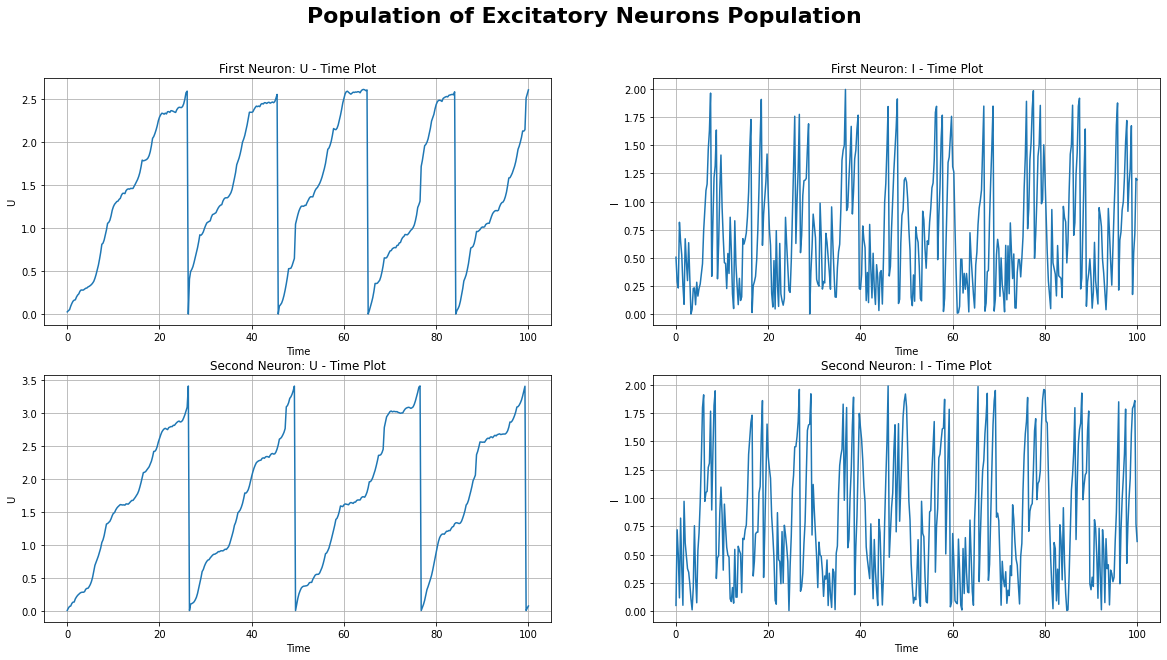

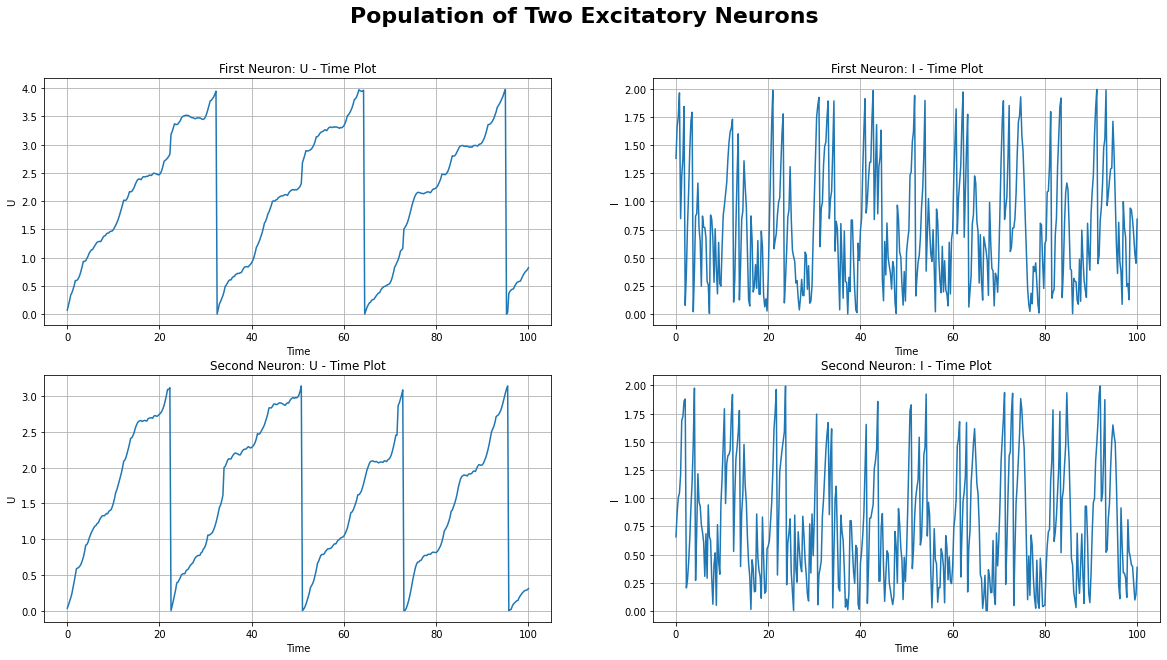

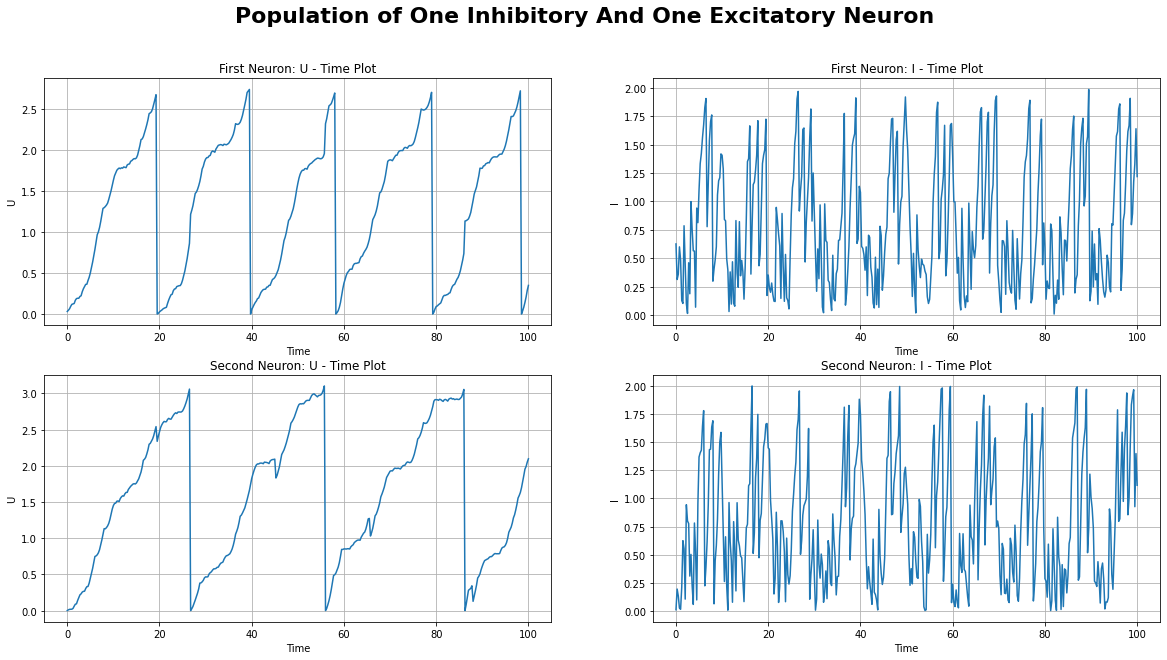

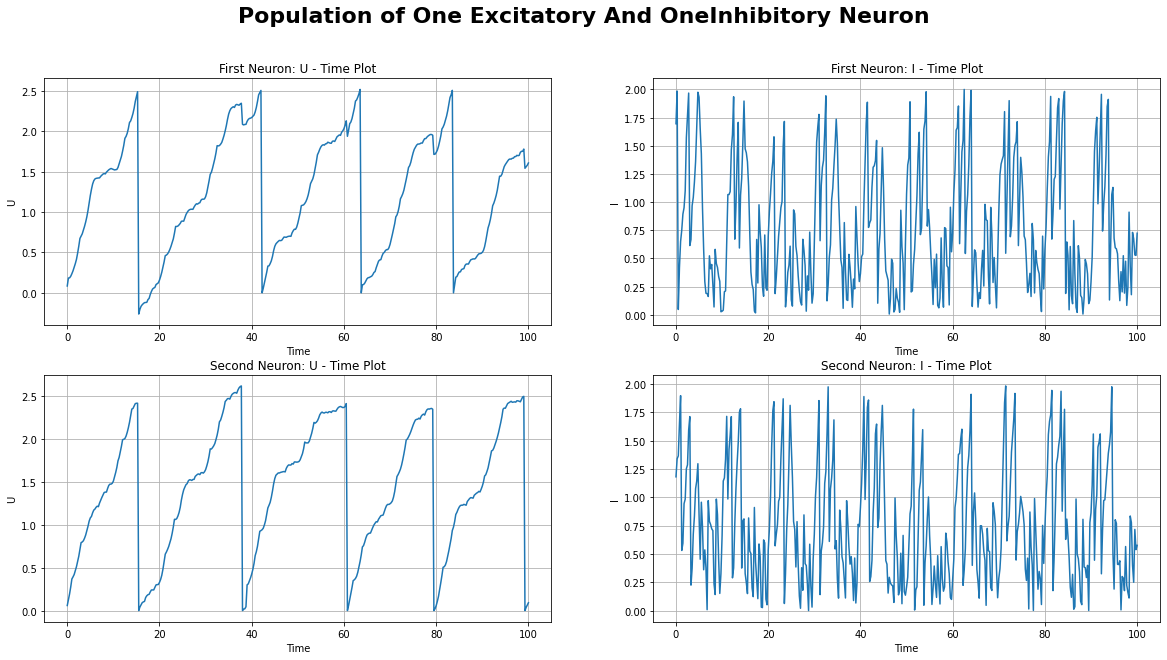

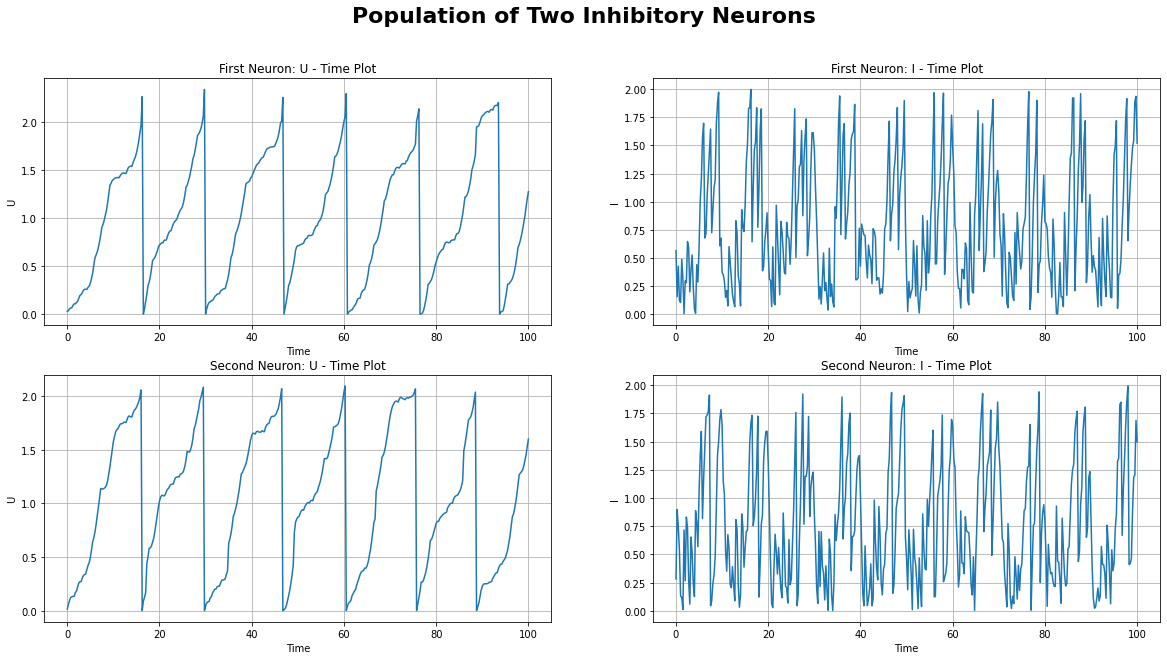

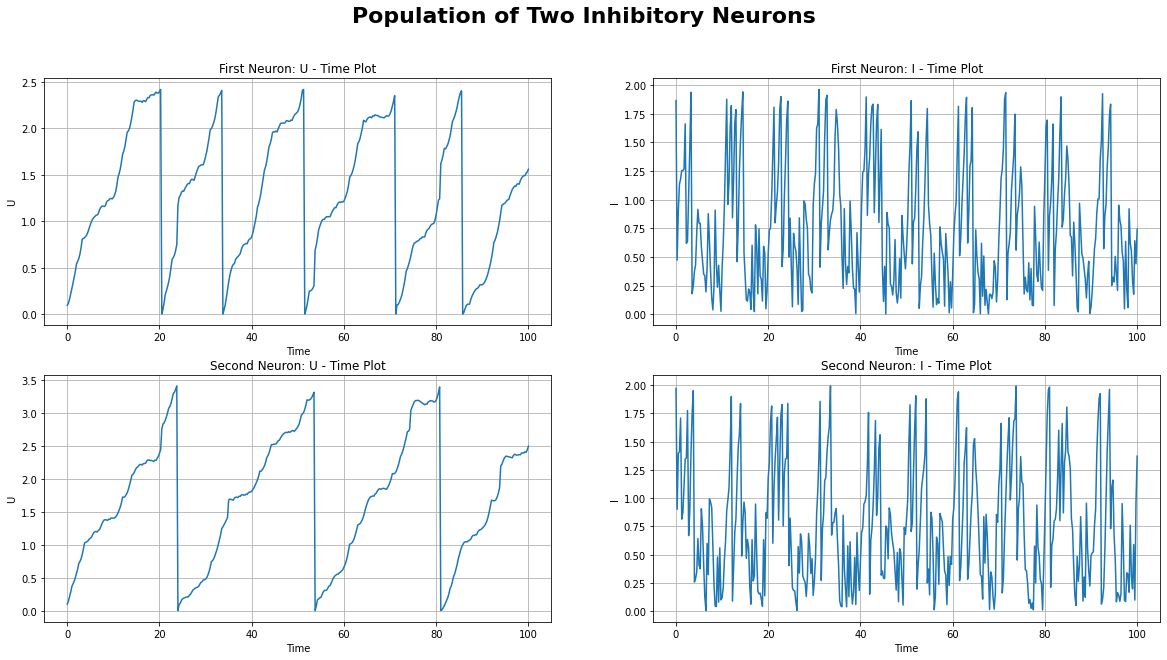

In [38]:
%run Neuron.ipynb
%run Random.ipynb

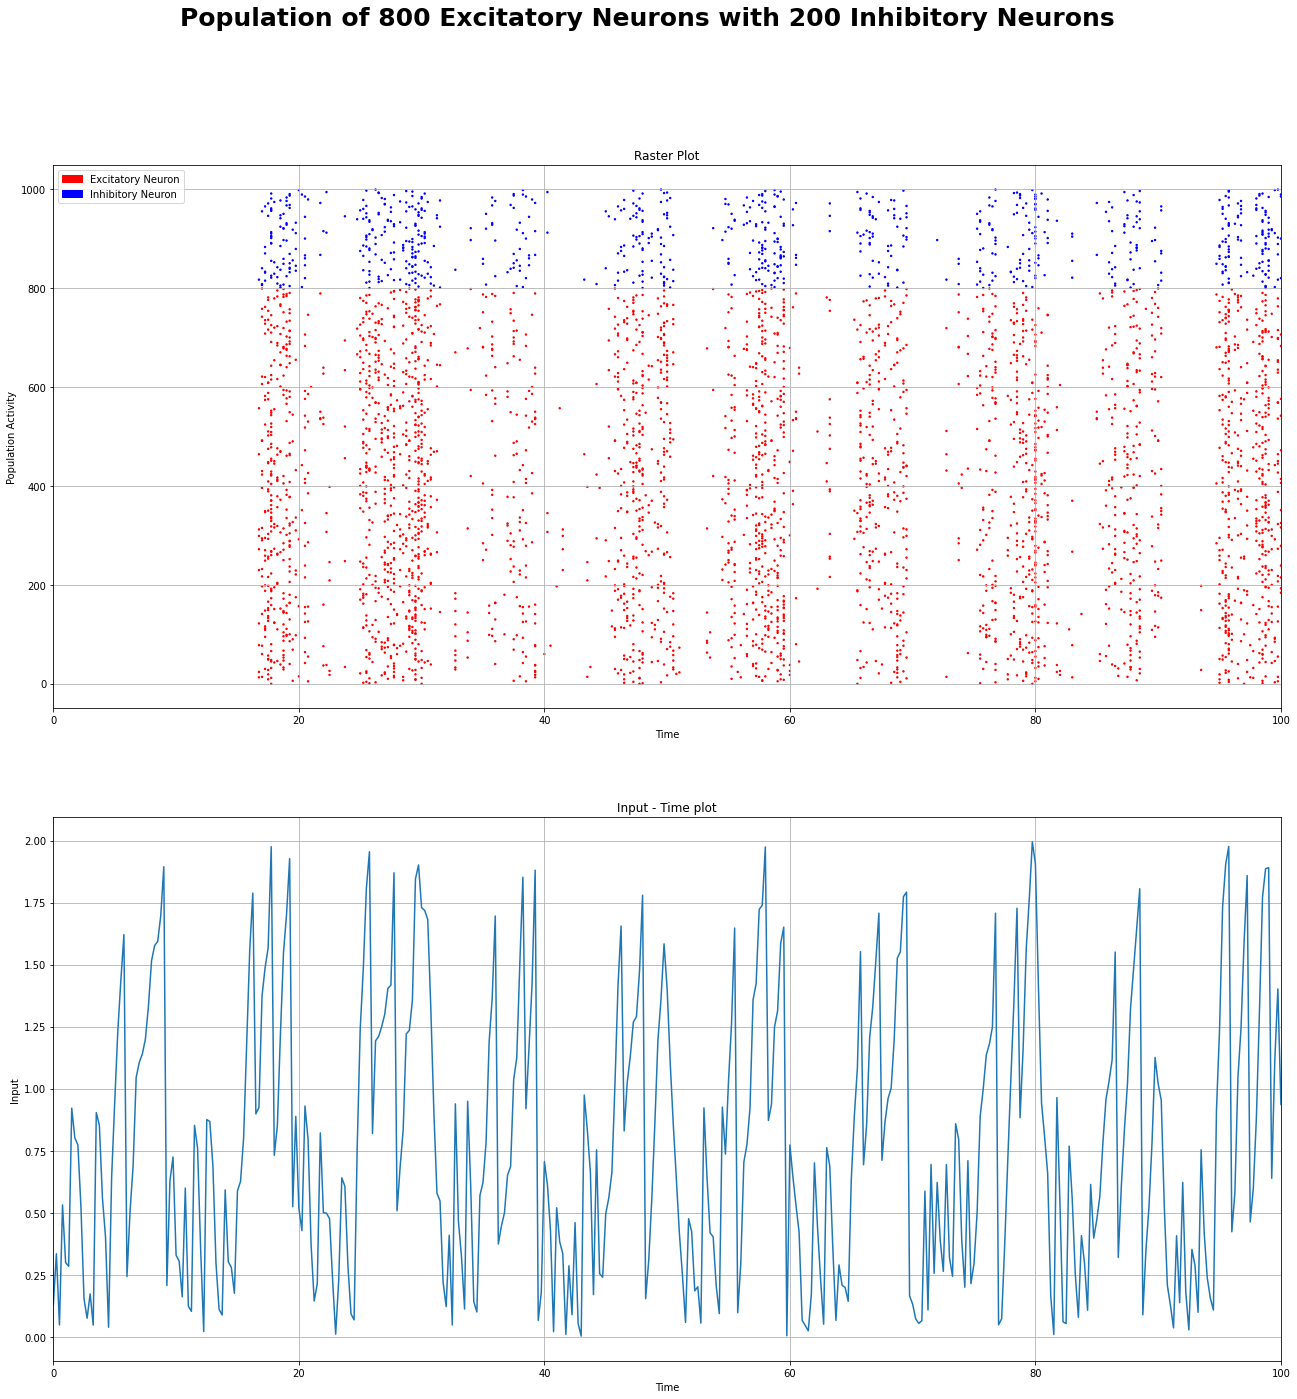

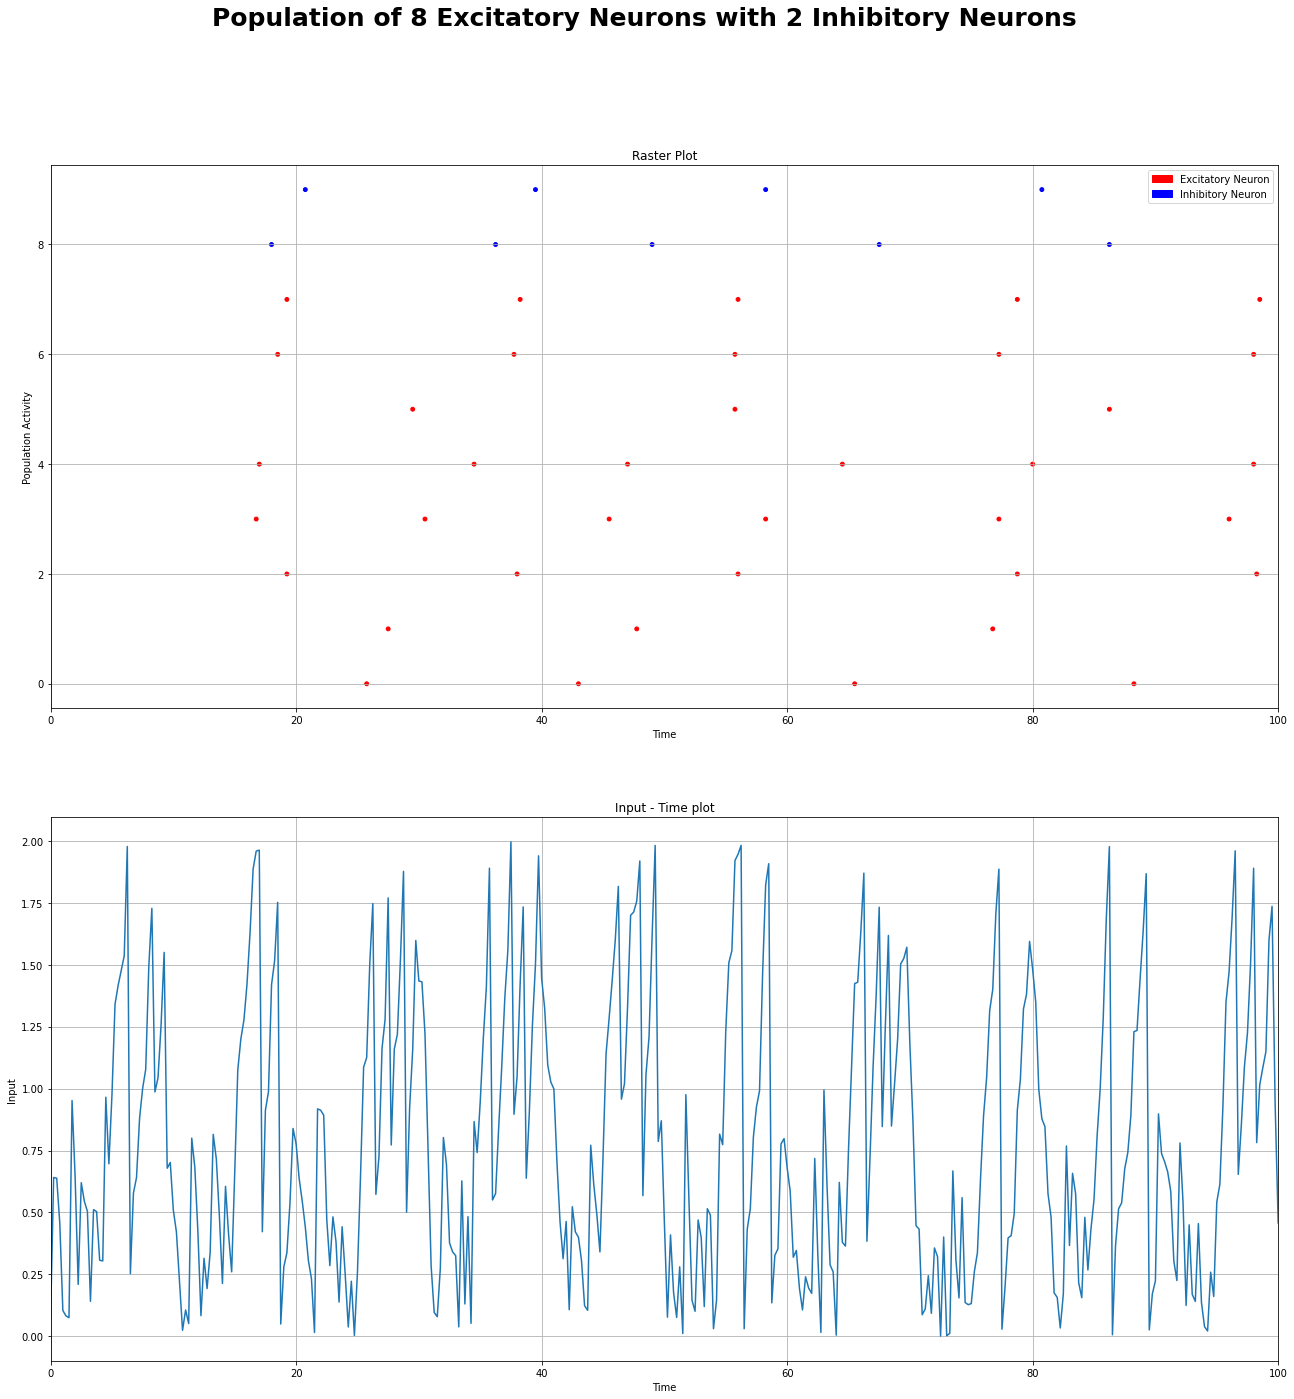

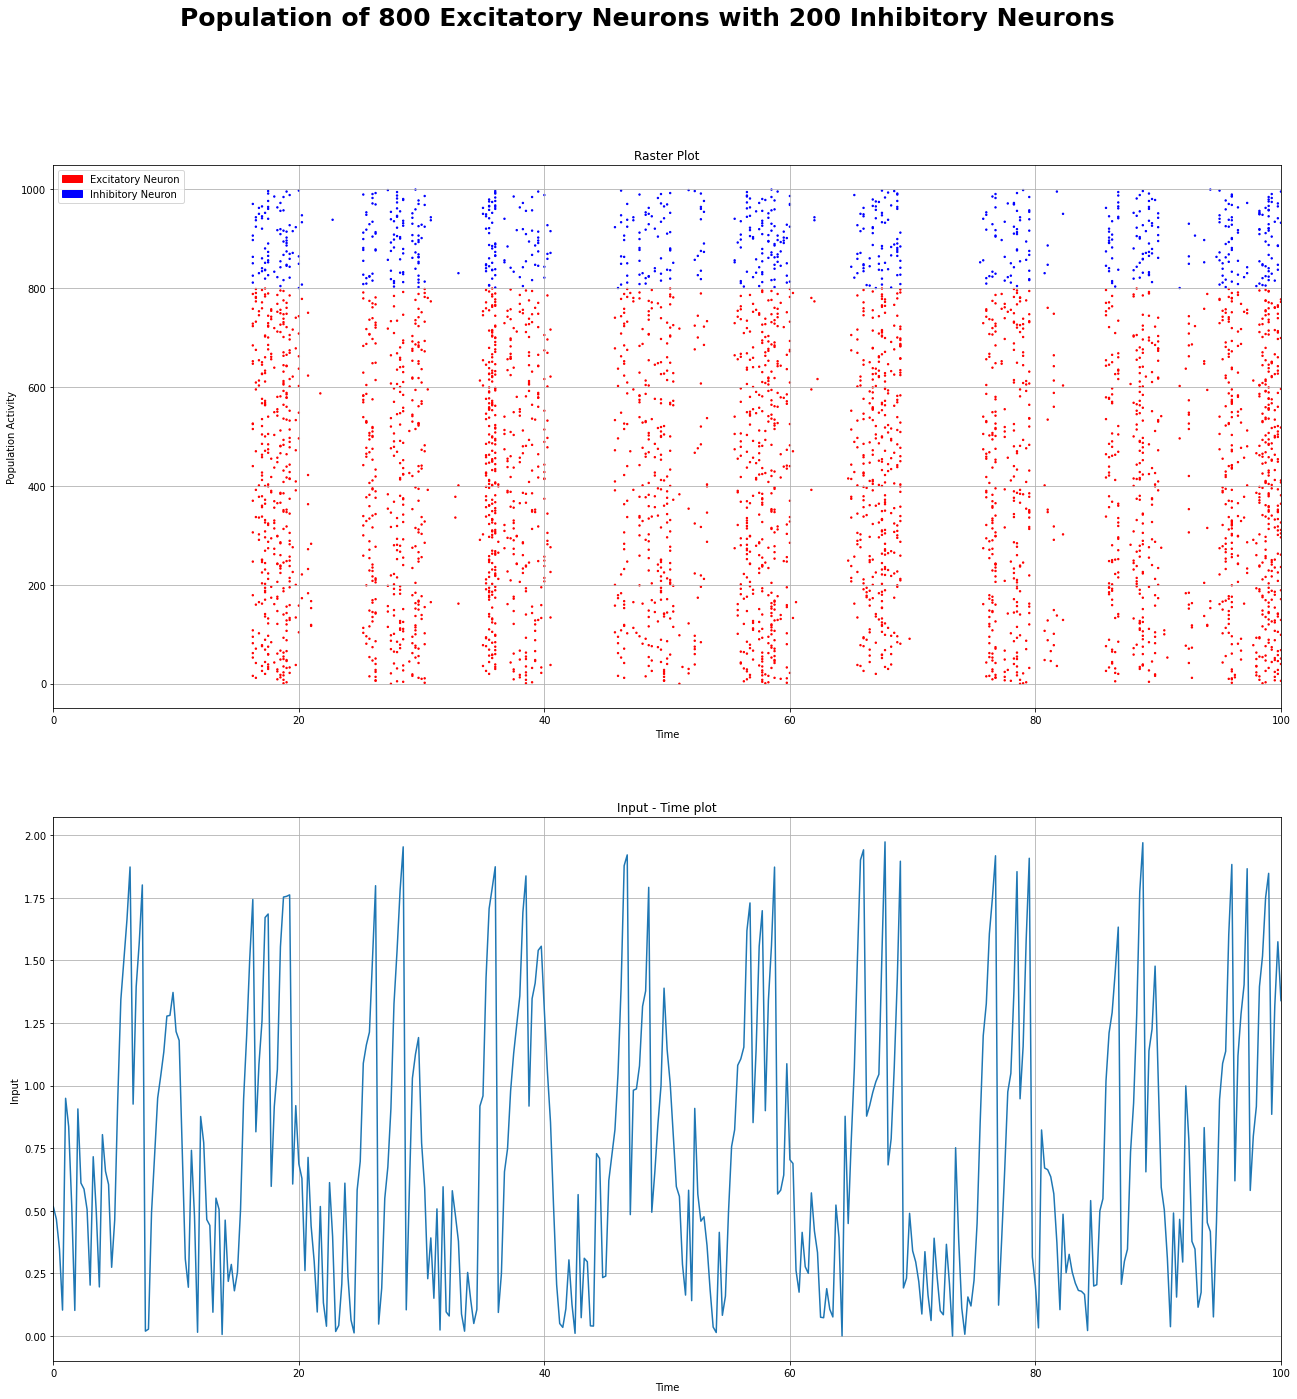

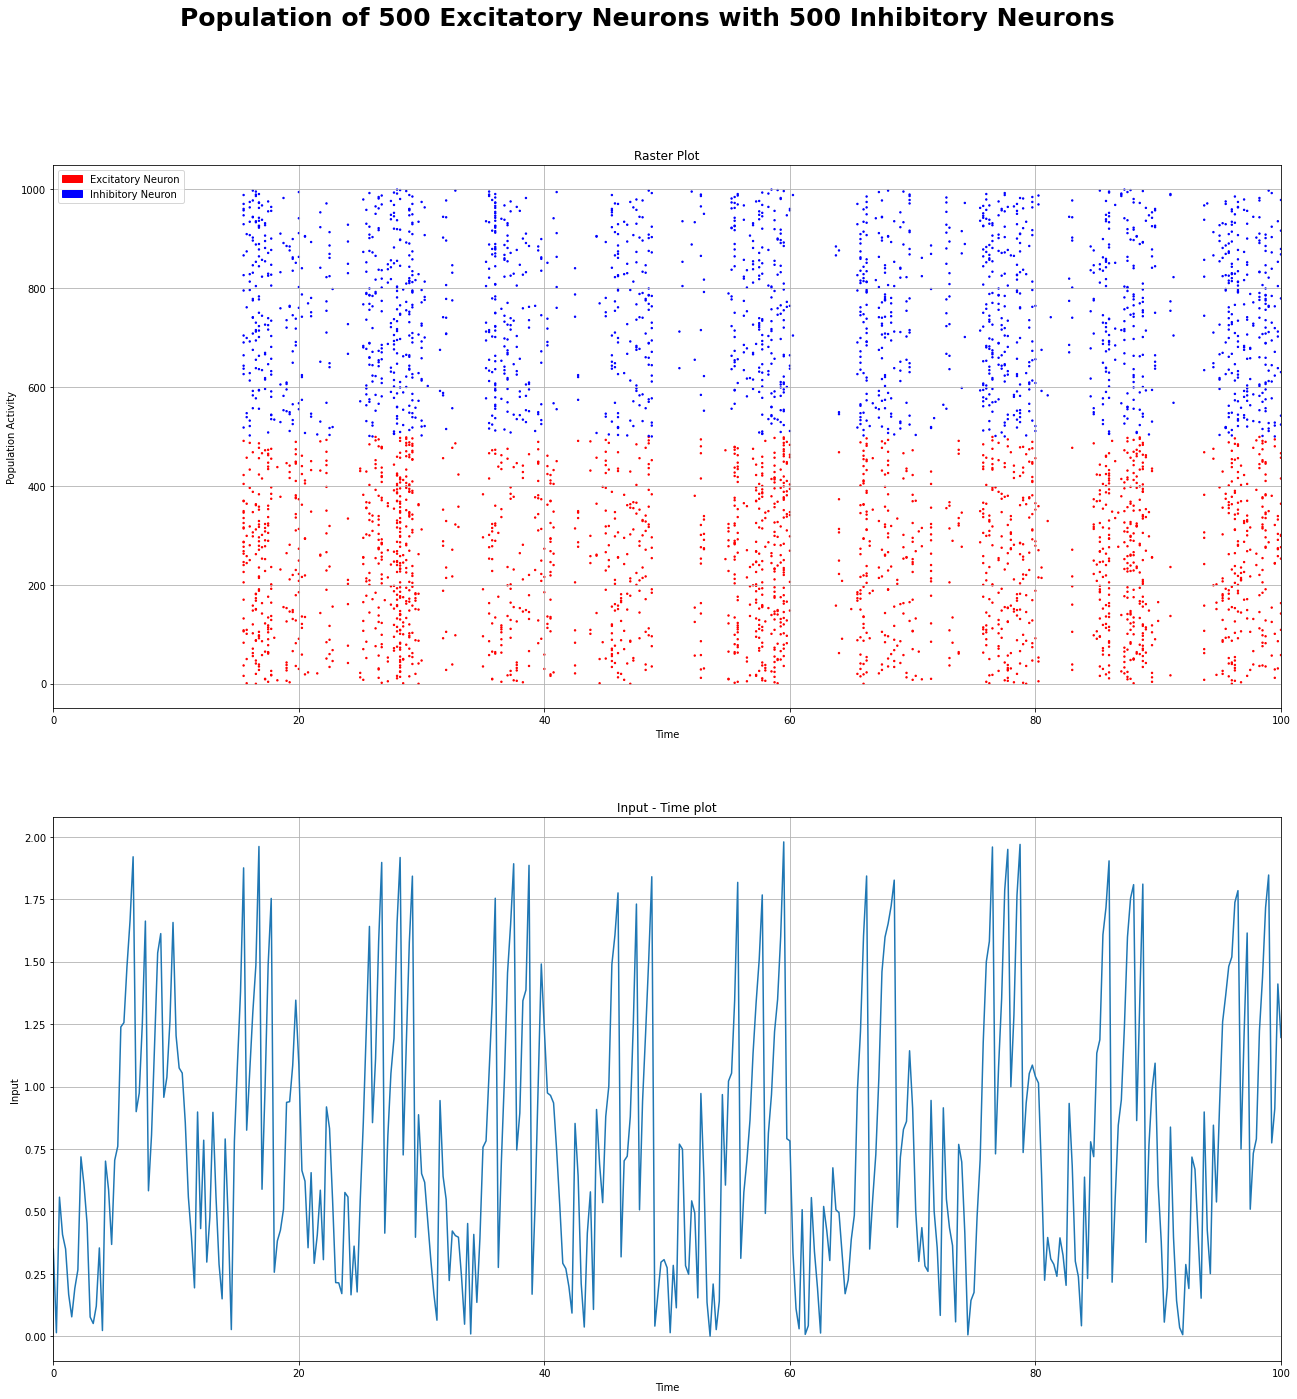

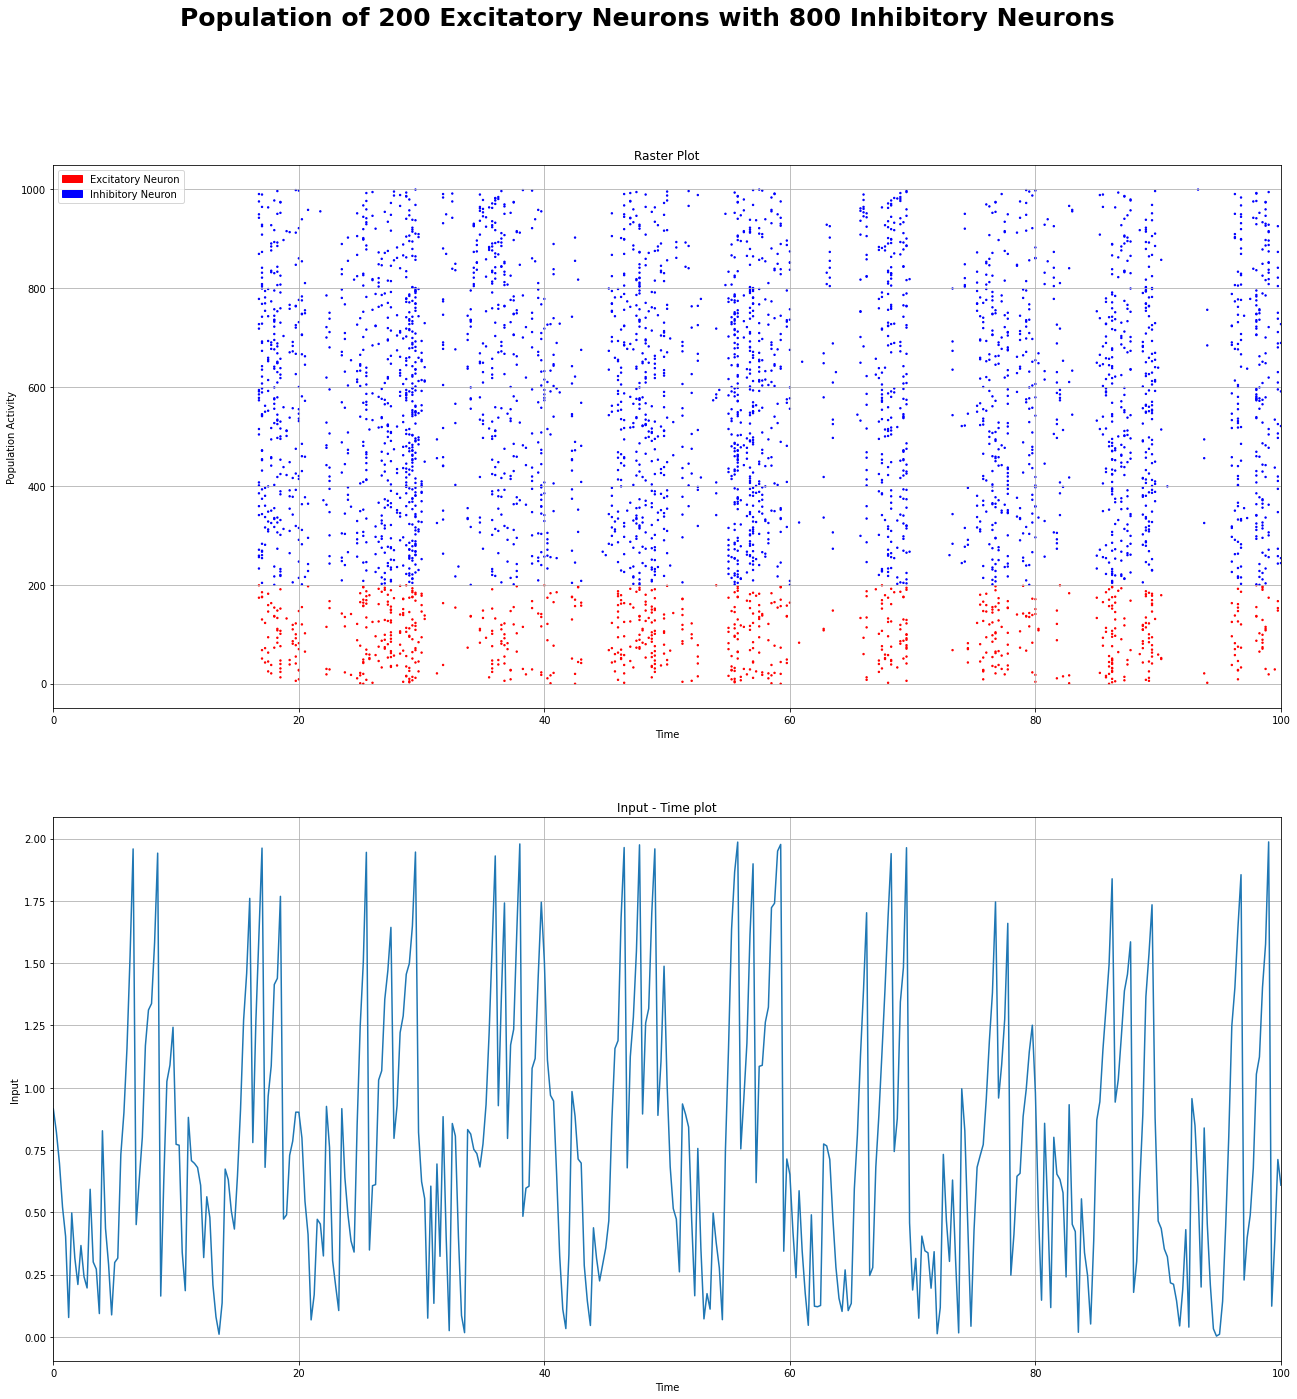

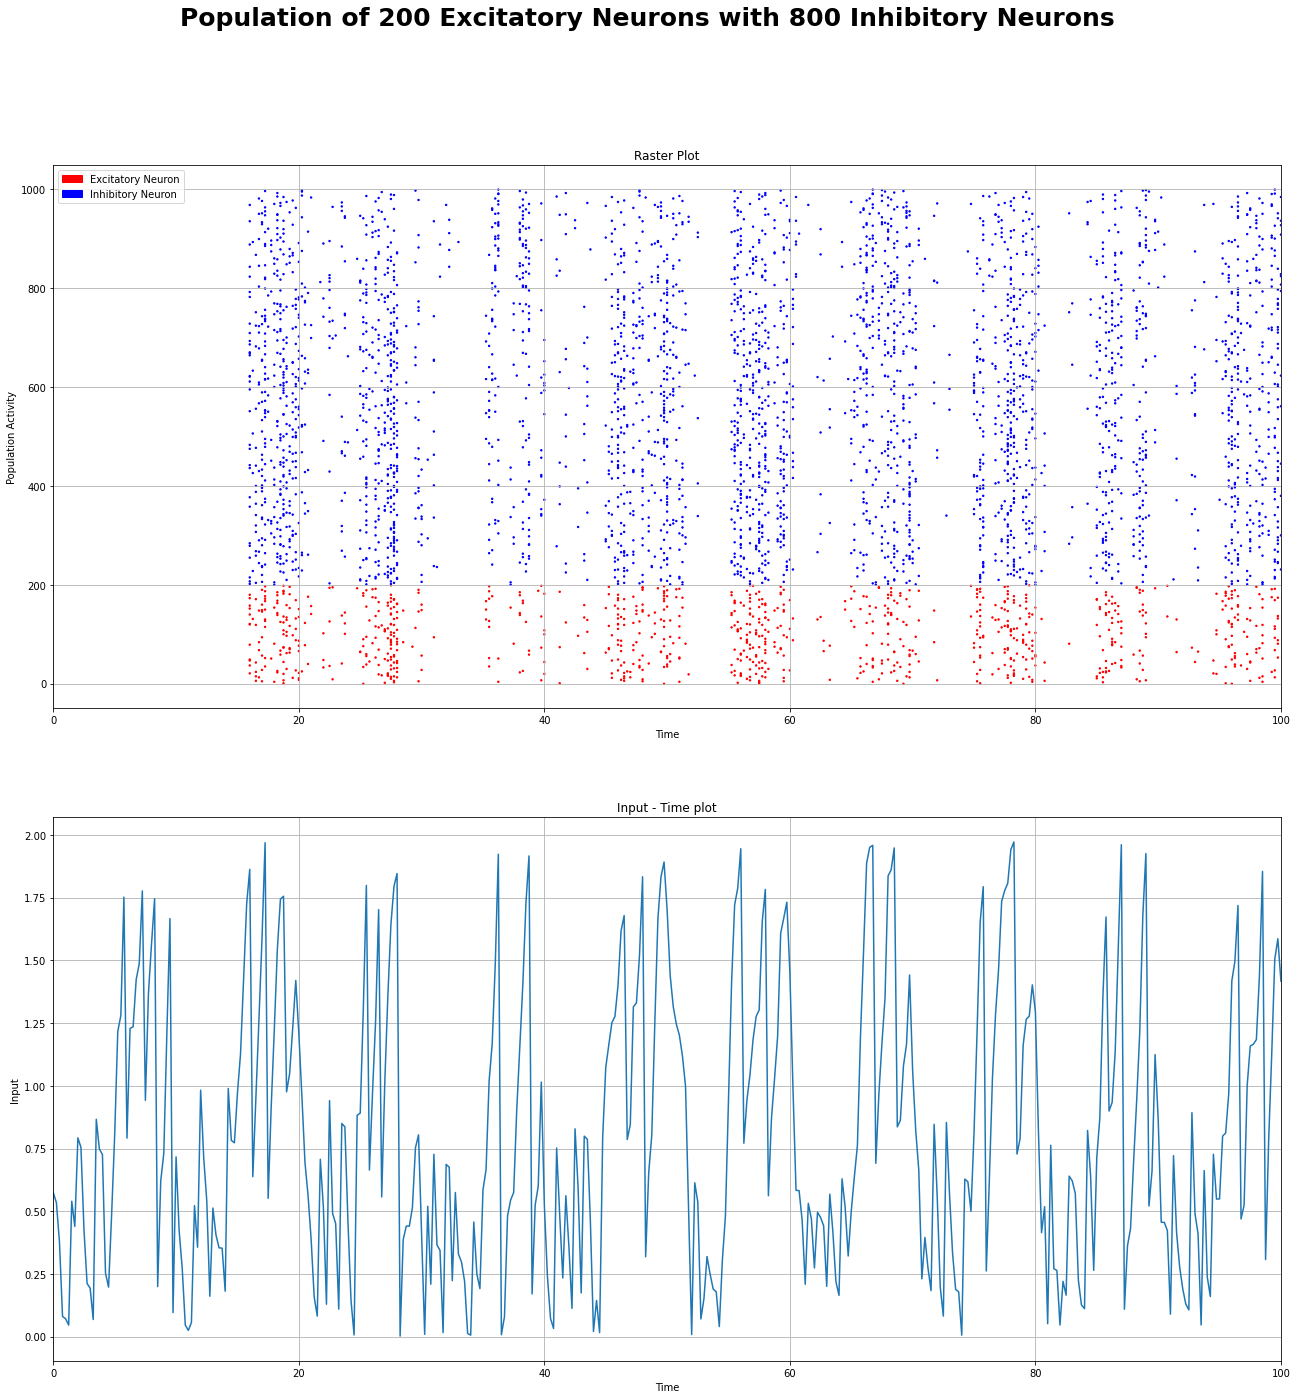

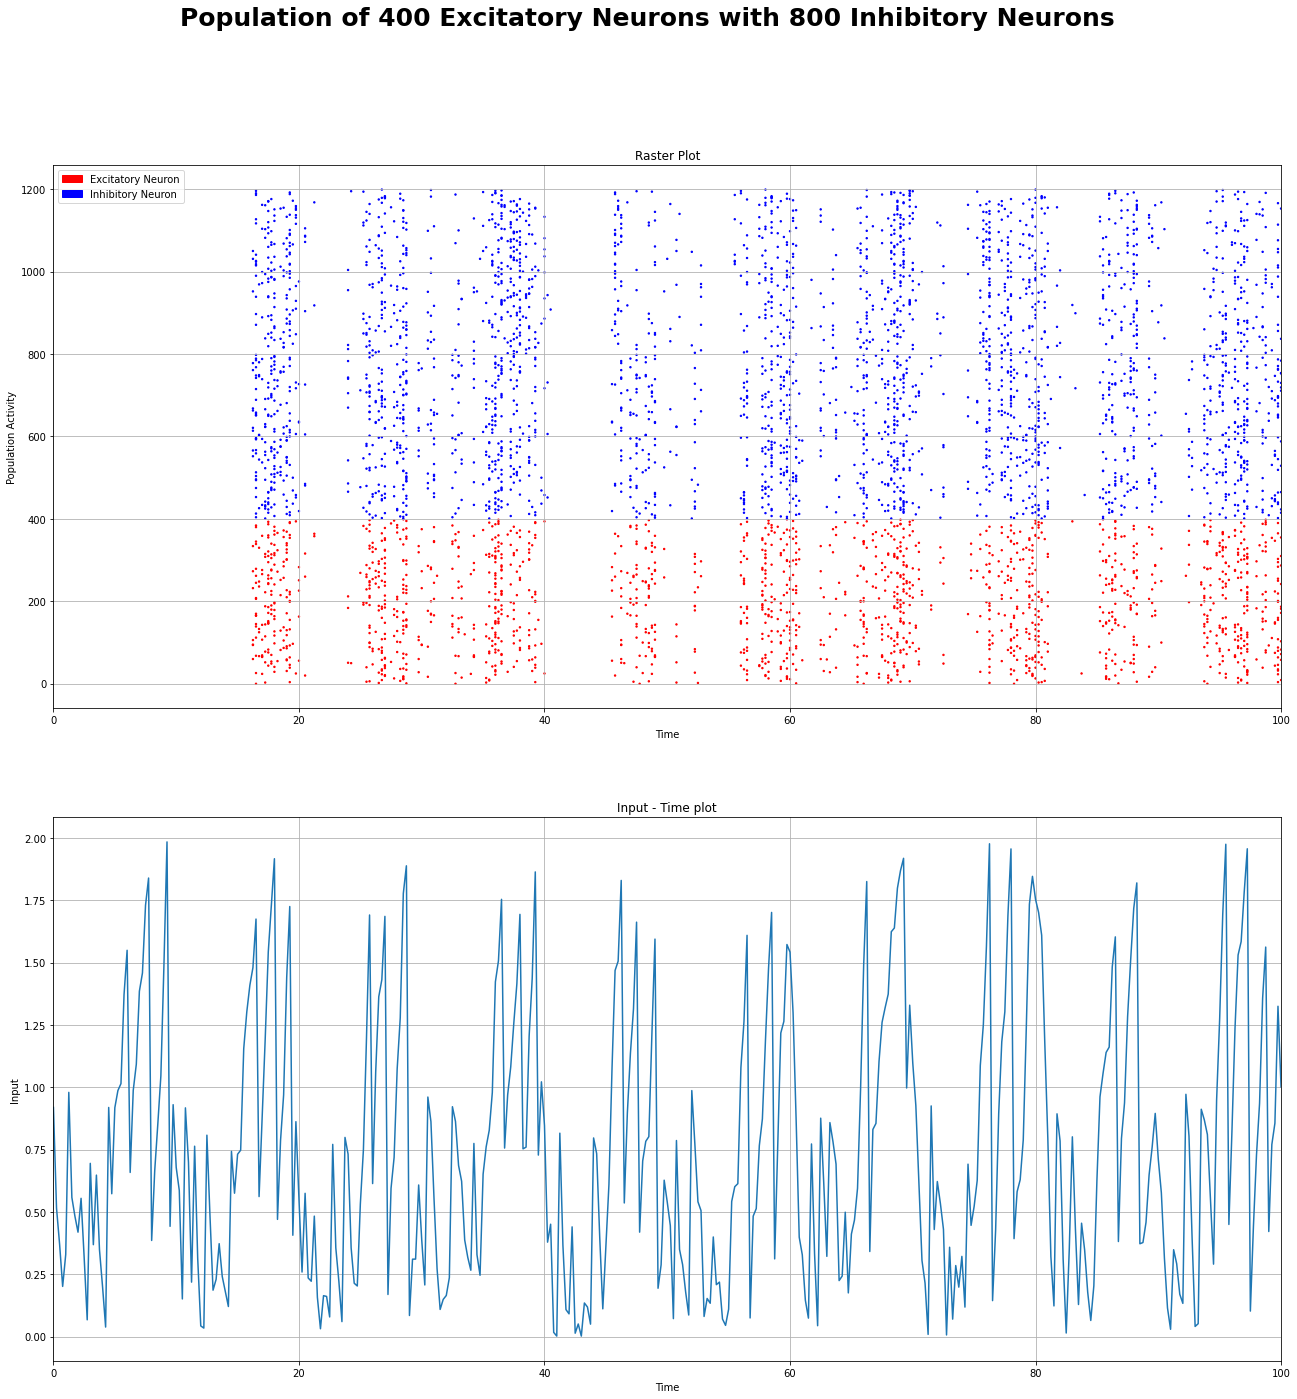

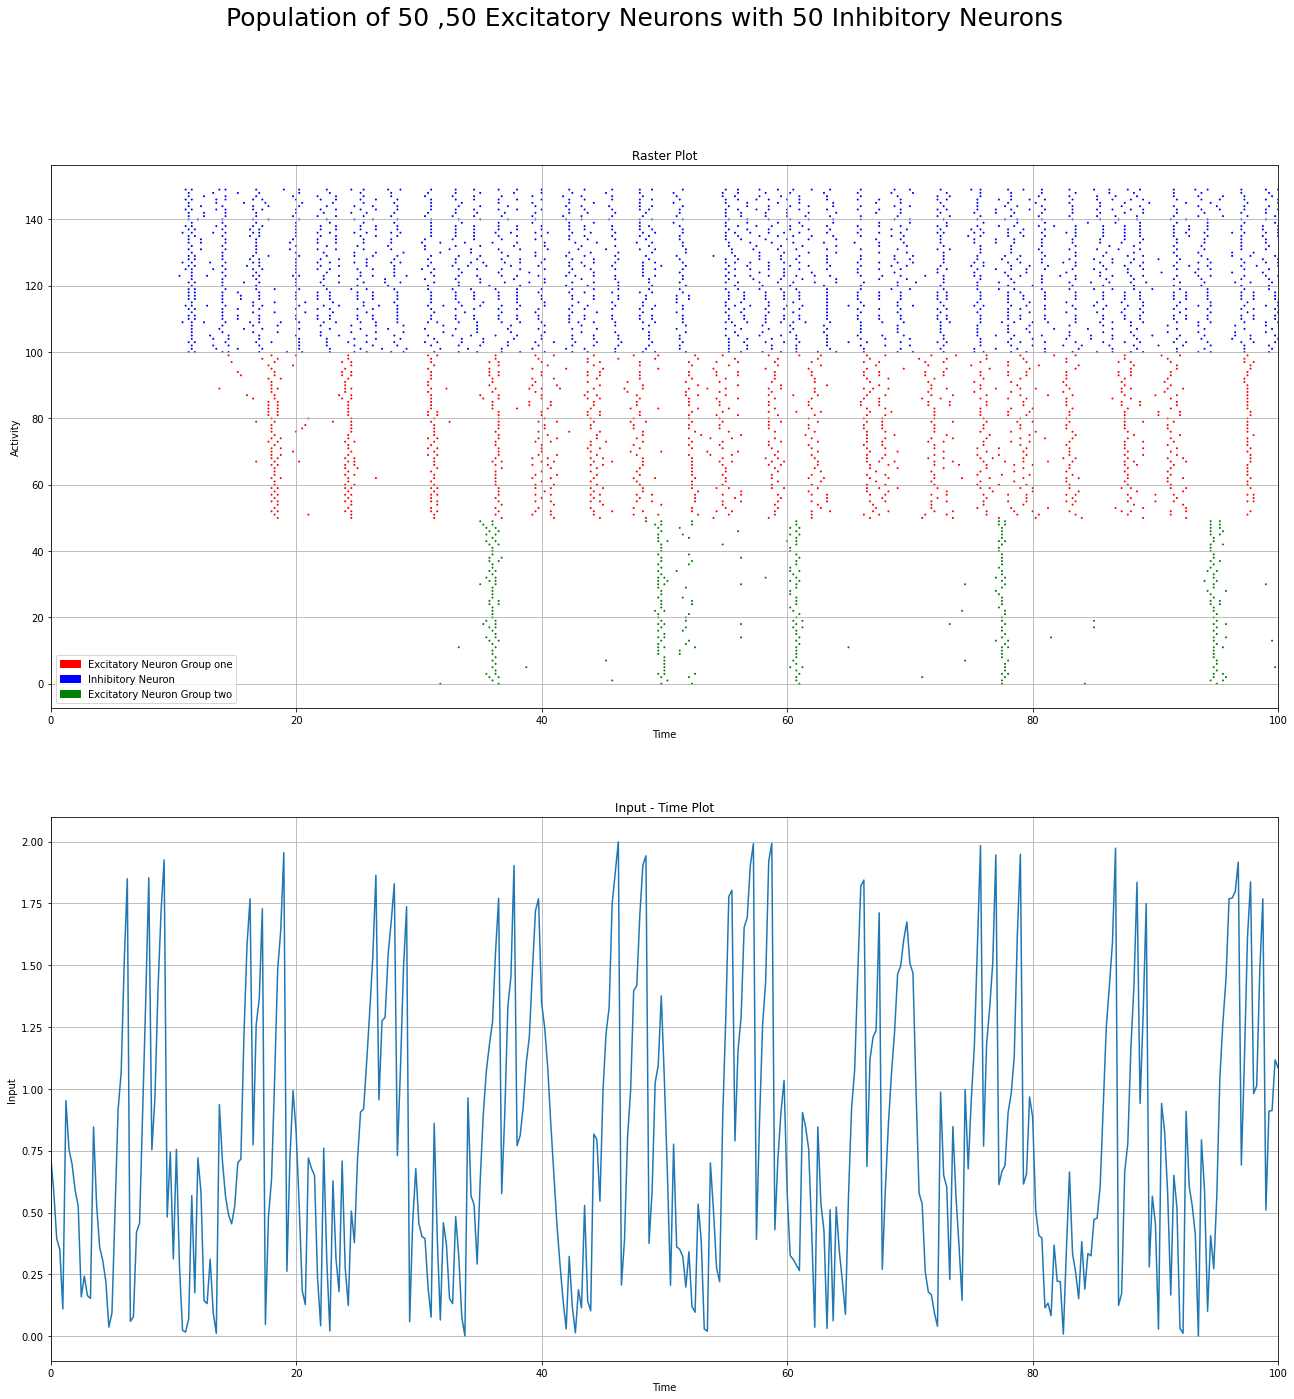

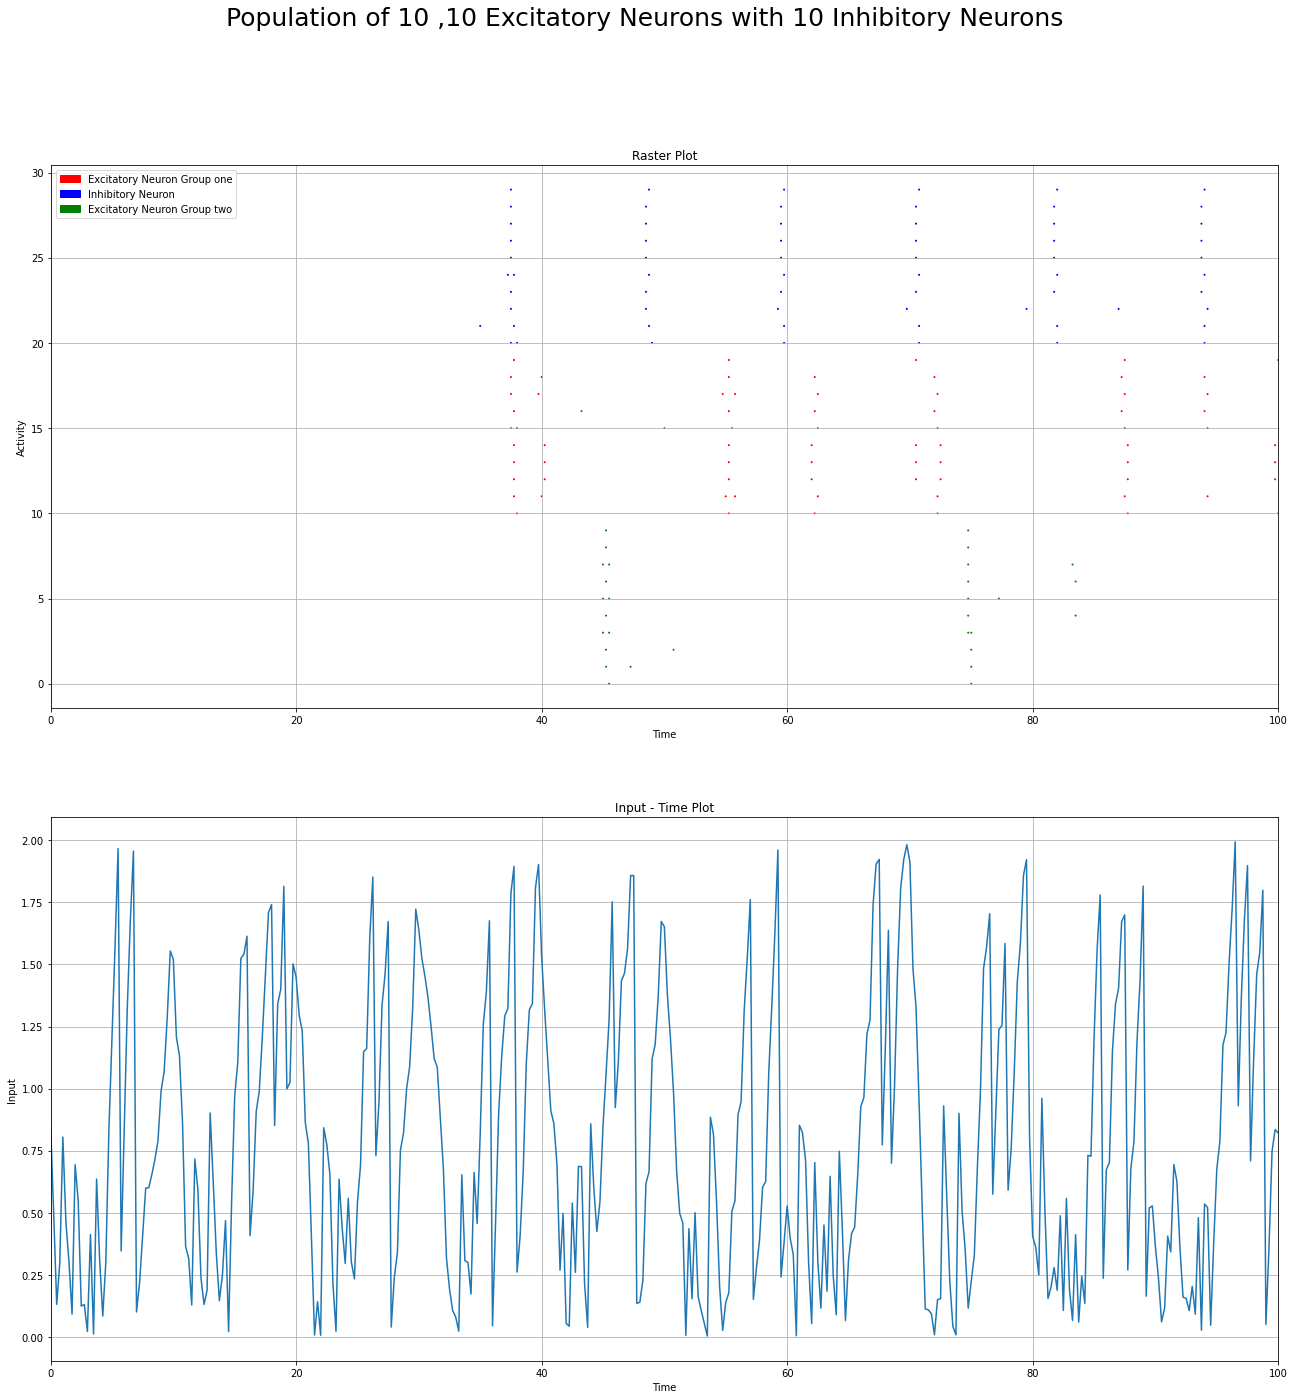

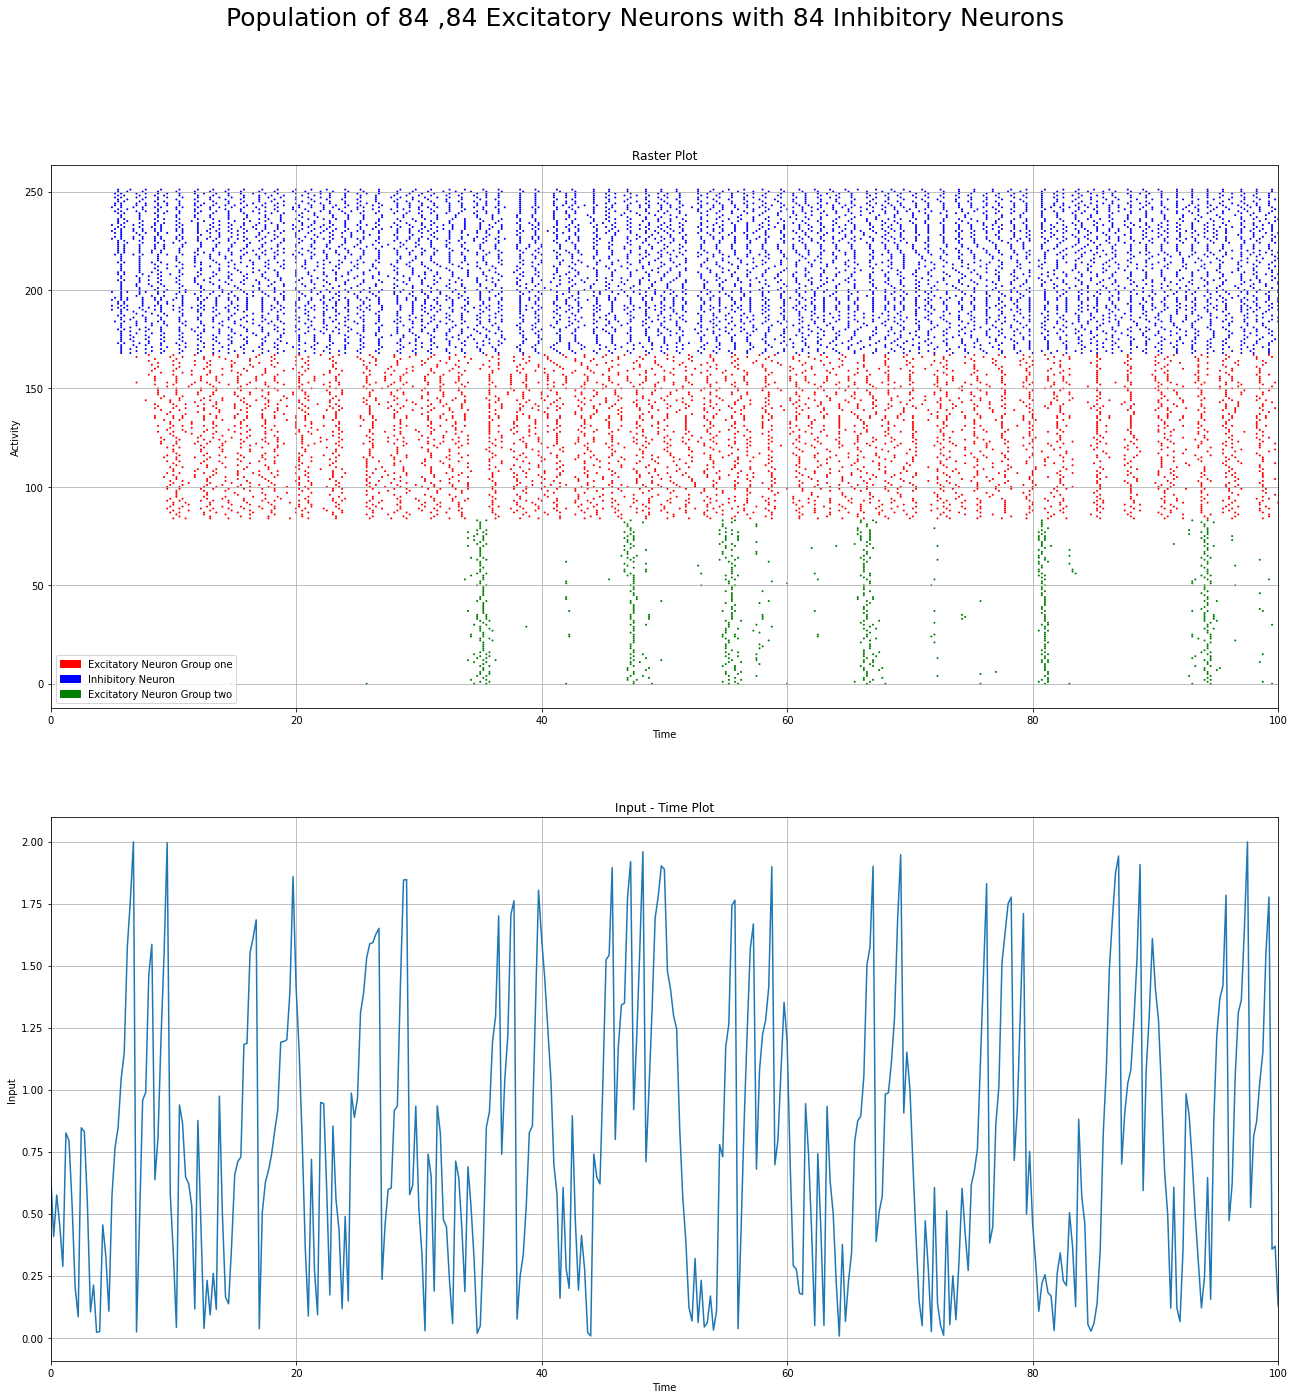

In [39]:

from typing import List

#from Untitled import Neuron
import matplotlib.patches as mpatches
from matplotlib.pyplot import *
#import tqdm
#from Random import Rand_current
#from Neuron import Neuron
#from Random import Rand_current


class Population:
    def __init__(self, j_0=0.1, exci_n=800, inhi_n=200):
        self.N = inhi_n + exci_n
        self.w = j_0 / self.N
        self.p = []
        self.exci_n = exci_n
        self.inhi_n = inhi_n


    def movement(self, cir_size=2):
        tmp = 0
        for i in range(self.inhi_n):
            self.p.append(Neuron(t="inhibitory", idx=tmp))
            tmp += 1
        for i in range(self.exci_n):
            self.p.append(Neuron(t="excitatory", idx=tmp))
            tmp += 1


        first_list = []
        for i in range(len(self.p[0].step)):
            first_list.append([-1 for x in range(self.N)])
        first_list = [[-1 for x in range(self.N)] for y in range(len(self.p[0].step))]

        rand_i = Rand_current()
        first_list_idx = []
        for i in range(len(self.p[0].step)):
            first_list_idx.append(rand_i.acquire(i))

        for i in (range(len(self.p[0].step))):
            current_i = first_list_idx[i]
            for g in self.p:
                result = g.bring_up_to_date(j=i, charge=current_i)
                if result > 0:
                    first_list[i][g.idx] = g.idx
                    for k in range(self.N):
                        self.p[k].update_potential(self.w * result, j=i, pre_t=g.t)

        # plotting
        second_list = []
        for i in range(len(self.p[0].step)):
            for g in range(self.N):
                if first_list[i][g] != -1:
                    second_list.append((self.p[0].step[i], first_list[i][g]))

        if len(second_list) == 0:
            print("No Single Neurons Fired! yet")
        else:
            fig = figure(num=None, figsize=(22, 22))
            fig.suptitle('Population of ' +
                         str(self.exci_n) + " Excitatory Neurons with " +
                         str(self.inhi_n) + " Inhibitory Neurons", fontsize=25,
                         fontweight='bold')
            ax = subplot(211)
            second_list = list(zip(*second_list))

            tmp = []
            for y in list(second_list[1]):
                tmp.append("r" if y < self.exci_n else "b")

            scatter(list(second_list[0]), list(second_list[1]), c=tmp, s=cir_size)
            ylabel('Population Activity')
            xlabel('Time')
            title('Raster Plot')
            red_patch = mpatches.Patch(color='red', label='Excitatory Neuron')
            blue_patch = mpatches.Patch(color='blue', label='Inhibitory Neuron')
            legend(handles=[red_patch, blue_patch])
            ax.set_xlim(xmin=0, xmax=self.p[0].time)
            grid(True)

            ax = subplot(212)
            plot(self.p[0].step, first_list_idx)
            ylabel('Input')
            xlabel('Time')
            title('Input - Time plot')
            ax.set_xlim(xmin=0, xmax=self.p[0].time)
            grid(True)

p = Population(exci_n=800, inhi_n=200)
p.movement()
###
p = Population(exci_n=8, inhi_n=2)
p.movement(cir_size=15)
###
p = Population(exci_n=800, inhi_n=200)
p.movement()
###
p = Population(exci_n=500, inhi_n=500)
p.movement()
###
p = Population(exci_n=200, inhi_n=800)
p.movement()
###
p = Population(exci_n=200, inhi_n=800)
p.movement()
###
p = Population(exci_n=400, inhi_n=800)
p.movement()


def figure_three_populations(first_exci_n, second_exci_n, inhi_n, c_s=1):
    N = first_exci_n + second_exci_n + inhi_n
    group: List[Neuron] = []
    weight = []
    c = 0
    for i in range(inhi_n):
        group.append(Neuron(t="inhibitory", idx=c, p=1))
        c += 1
    for i in range(first_exci_n):
        group.append(Neuron(t="excitatory", idx=c, p=2))
        c += 1
    for i in range(second_exci_n):
        group.append(Neuron(t="excitatory", idx=c, p=3))
        c += 1

    weight = []
    for _ in range(N):
        weight.append([0 for _ in range(N)])

    for i in range(inhi_n):
        for j in range(inhi_n):
            weight[i][j] = 1 / inhi_n
    for i in range(inhi_n, inhi_n + first_exci_n):
        for j in range(inhi_n, inhi_n + first_exci_n):
            weight[i][j] = 1 / first_exci_n
    for i in range(inhi_n + first_exci_n, inhi_n + first_exci_n + second_exci_n):
        for j in range(inhi_n + first_exci_n, inhi_n + first_exci_n + second_exci_n):
            weight[i][j] = 1 / second_exci_n


    weight[first_exci_n][0] = 0.04
    weight[0][first_exci_n] = 0.04
    weight[first_exci_n + second_exci_n][0] = 0.04
    weight[0][first_exci_n + second_exci_n] = 0.04

    temp = []
    for i in range(len(group[0].step)):
        temp.append([-1 for x in range(N)])
    first_list_idx = [0] * len(group[0].step)
    Input_i = 1
    i_gen = Rand_current(i=Input_i, stp=100)

    for i in (range(len(group[0].step))):
        current_i = i_gen.acquire(i)
        first_list_idx[i] = current_i
        for g in group:
            if g.t == "inhibitory":
                current_i = 0.4
            if g.p == 2:
                current_i *= 1.02
            result = g.bring_up_to_date(j=i, charge=current_i)
            if result > 0:
                temp[i][g.idx] = g.idx
                for k in range(N):
                    if g.idx != group[k].idx:
                        group[k].update_potential(weight[g.idx][k] * result, j=i, pre_t=g.t)

    # plotting
    list1 = []
    for i in range(len(group[0].step)):
        for g in range(N):
            if temp[i][g] != -1:
                list1.append((group[0].step[i], temp[i][g]))
    if len(list1) == 0:
        print("single neuron???")

    fig = figure(num=None, figsize=(22, 22))
    fig.suptitle('Population of ' + str(first_exci_n) +
                 " ," + str(second_exci_n) + " Excitatory Neurons with "
                 + str(inhi_n) + " Inhibitory Neurons", fontsize=25,
                 )
    ax = subplot(211)
    list1 = list(zip(*list1))

    c = []
    for temp in list(list1[1]):
        if temp < inhi_n:
            c.append("g")
        if inhi_n <= temp < first_exci_n + inhi_n:
            c.append("r")
        if temp >= inhi_n + first_exci_n:
            c.append("b")

            
    scatter(list(list1[0]), list(list1[1]), c=c, s=c_s)
    ylabel('Activity')
    xlabel('Time')
    title('Raster Plot')
    red_patch = mpatches.Patch(color='red', label='Excitatory Neuron Group one')
    green_patch = mpatches.Patch(color='green', label='Excitatory Neuron Group two')
    blue_patch = mpatches.Patch(color='blue', label='Inhibitory Neuron')
    legend(handles=[red_patch, blue_patch, green_patch])
    ax.set_xlim(xmin=0, xmax=group[0].time)
    grid(True)

    
    ax = subplot(212)
    plot(group[0].step, first_list_idx)
    ylabel('Input')
    xlabel('Time')
    title('Input - Time Plot')
    ax.set_xlim(xmin=0, xmax=group[0].time)
    grid(True)



figure_three_populations(50, 50, 50)
###
figure_three_populations(10, 10, 10)
###
figure_three_populations(84, 84, 84)